In [34]:
# site: colab.research.google.com
# Logar com o e-mail da Puc
# Novo NoteBook


# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)


2.18.0


In [35]:
# Importando pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')



In [38]:

# Carrega conjunto de dados
dados = pd.read_csv('/content/Treino Roupa.csv', header=None)



# Ver dados
dados.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:


# Tamanho da matriz
dados.shape




(70000, 785)

In [40]:
# Divide em Entrada e Resposta
X1 = dados.iloc[:,1:785] #Entrada
X1



,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [41]:


# Normnaliza os dados
scaler = StandardScaler()
XX = scaler.fit_transform(X1)

XX




array([[-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352],
       [-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352],
       [-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352],
       ...,
       [-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352],
       [-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352],
       [-0.00883265, -0.02162585, -0.0287172 , ..., -0.15825699,
        -0.09035386, -0.03423352]])

In [42]:
# Dados Respostas
Y1 = dados.iloc[:,0] #Resposta
Y = Y1.values
Y




array([9, 0, 0, ..., 3, 0, 5])

In [43]:
# Transforma os dados
Y2 = []
for i in range(len(Y)):
    linha = []
    for j in range(10):
      if (j) == Y[i]:
        linha += [1]
      else:
        linha += [0]
    Y2.append(linha)


YY = pd.DataFrame(data=Y2,columns=['Camisetas/Top', 'Calça', 'Suéter', 'Vestidos', 'Casaco', 'Sandálias', 'Camisas', 'Tênis', 'Bolsa', 'Botas'])

# Ver Y
YY.head()


,Camisetas/Top,Calça,Suéter,Vestidos,Casaco,Sandálias,Camisas,Tênis,Bolsa,Botas
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


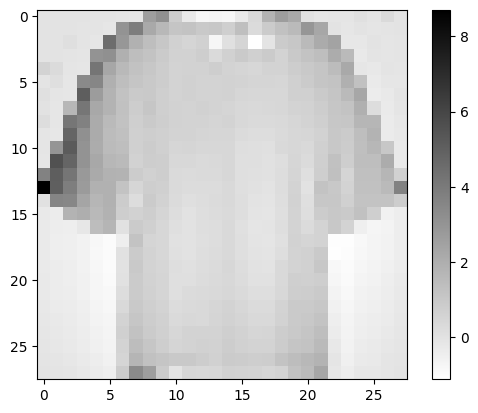

In [44]:
# Mostra Imagens
plt.figure()
m = np.zeros((28, 28))
k = 0
for i in range(28):
    for j in range(28):
      if (k) < 785:
        m[i][j] = (XX[77][k])
        k = k + 1

plt.imshow(m, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()



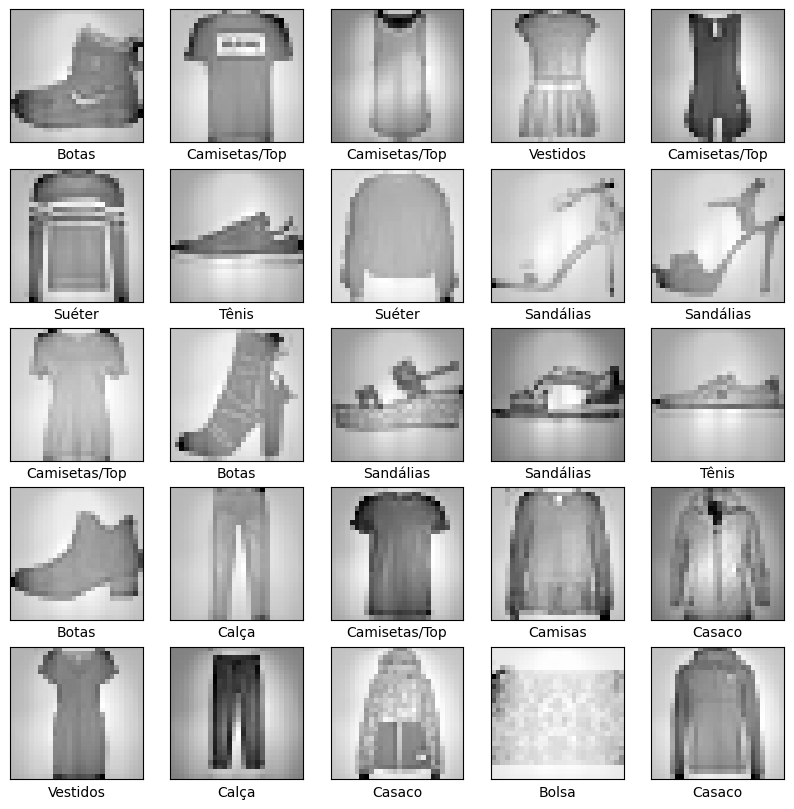

In [45]:
# Mostra todos os tipos de roupa
class_names = ['Camisetas/Top', 'Calça', 'Suéter', 'Vestidos', 'Casaco', 'Sandálias', 'Camisas', 'Tênis', 'Bolsa', 'Botas']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    m = np.zeros((28, 28))
    k = 0
    for l in range(28):
      for j in range(28):
        if (k) < 785:
          m[l][j] = (XX[i][k])
          k = k + 1

    plt.imshow(m, cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.show()



In [47]:
# Carrega conjunto de teste
testes = pd.read_csv('/content/Teste Roupa.csv',header=None)

# Ver testes
testes.head()



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0


In [48]:
# Divide em Entrada
Xtestes1 = testes.iloc[:,1:785] #Entrada

# Ver os testes
Xtestes1



,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:


# Normnaliza os dados de testes
scaler = StandardScaler()
Xt = scaler.fit_transform(Xtestes1)

Xt



array([[-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       ...,
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079]])

In [50]:
Yt1 = testes.iloc[:,0] #Resposta
Yt = Yt1.values
Yt


array([9, 2, 1, ..., 8, 1, 5])

In [51]:
# Transforma os dados de teste
Yt2 = []
for i in range(len(Yt)):
    linha = []
    for j in range(10):
      if (j) == Yt[i]:
        linha += [1]
      else:
        linha += [0]
    Yt2.append(linha)


YYt = pd.DataFrame(data=Yt2,columns=['Camisetas/Top', 'Calça', 'Suéter', 'Vestidos', 'Casaco', 'Sandálias', 'Camisas', 'Tênis', 'Bolsa', 'Botas'])

# Ver Y
YYt.head()


,Camisetas/Top,Calça,Suéter,Vestidos,Casaco,Sandálias,Camisas,Tênis,Bolsa,Botas
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [52]:
YYt.shape

(10000, 10)

In [53]:
# Define o Modelo
modelo = Sequential()
modelo.add(Dense(56, input_dim=784, activation='relu'))
# modelo.add(Dense(28, activation='relu'))
modelo.add(Dense(10, activation='softmax'))


In [54]:
# Compila o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
# Treina o Modelo
resultado = modelo.fit(XX, YY, batch_size = 128, epochs = 200, verbose=0, validation_data=(Xt, YYt))

In [57]:
# Mostra a rede
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 56)                  │          43,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,592 (521.85 KB)

 Trainable params: 44,530 (173.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,062 (347.90 KB)

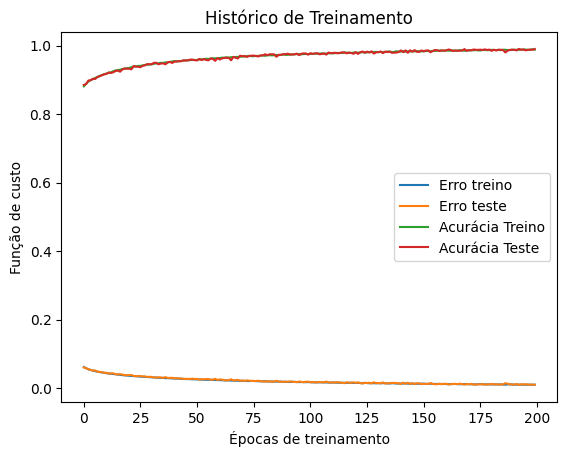

In [58]:

# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.plot(resultado.history['accuracy'])
plt.plot(resultado.history['val_accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste', 'Acurácia Treino', 'Acurácia Teste'])
plt.show()


In [59]:
# Testa a rede
Y_predito = modelo.predict(Xt)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [60]:
Y_predito1 = np.array([])
Yr = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
      if Y_parte[j]==1:
        Resp = ([j+1])

    Yr = np.concatenate((Yr,Resp))


Yr



A saída de streaming foi truncada nas últimas 5000 linhas.
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0

array([10.,  3.,  2., ...,  9.,  2.,  6.])

In [61]:

YYr = np.array([])
for i in range(len(Yr)):
  if Yr[i] == 10:
    r = "9-Botas"
  if Yr[i] == 9:
    r = "8-Bolsa"
  if Yr[i] == 8:
    r = "7-Tênis"
  if Yr[i] == 7:
    r = "6-Camisas"
  if Yr[i] == 6:
    r = "5-Sandálias"
  if Yr[i] == 5:
    r = "4-Casaco"
  if Yr[i] == 4:
    r = "3-Vestidos"
  if Yr[i] == 3:
    r = "2-Suéter"
  if Yr[i] == 2:
    r = "1-Calça"
  if Yr[i] == 0:
    r = "0-Camisetas/Top"

  YYr = np.concatenate((YYr,[r]))

YYr



array(['9-Botas', '2-Suéter', '1-Calça', ..., '8-Bolsa', '1-Calça',
       '5-Sandálias'], dtype='<U32')

In [62]:
# Contagem de Acertos
total = 0
correto = 0
errado = 0
for i in range(len(Yt)):
  total=total+1
  if(Yt[i] == Yr[i]-1):
    correto=correto+1
  else:
    errado=errado+1

print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))





Total 10000
Correto 9904
Errado 96


In [63]:
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')







A saída de streaming foi truncada nas últimas 5000 linhas.
L0N704                   -> L1N50 = 0.08826158195734024
L0N704                   -> L1N51 = 0.2094365805387497
L0N704                   -> L1N52 = 0.117695651948452
L0N704                   -> L1N53 = -0.38394272327423096
L0N704                   -> L1N54 = -0.14374010264873505
L0N704                   -> L1N55 = -0.19579851627349854
L0N705                   -> L1N0 = 0.5552407503128052
L0N705                   -> L1N1 = -0.21855463087558746
L0N705                   -> L1N2 = -0.1745777130126953
L0N705                   -> L1N3 = 0.6519776582717896
L0N705                   -> L1N4 = 0.4511338174343109
L0N705                   -> L1N5 = -0.2659822702407837
L0N705                   -> L1N6 = -0.08790130913257599
L0N705                   -> L1N7 = -0.15883934497833252
L0N705                   -> L1N8 = 0.43004128336906433
L0N705                   -> L1N9 = -0.1355351060628891
L0N705                   -> L1N10 = 0.05082216858863830